<a href="https://colab.research.google.com/github/smu-linear-algebra2/hs/blob/main/4%EC%A3%BC%EC%B0%A8_opencv%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%9E%A9%ED%99%98%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

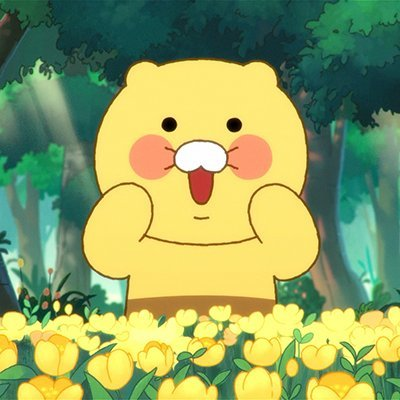

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import urllib.request

def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

image = url_to_image('https://pbs.twimg.com/profile_images/1641252178450083841/Cn2MUfHG_400x400.jpg')

cv2_imshow(image)

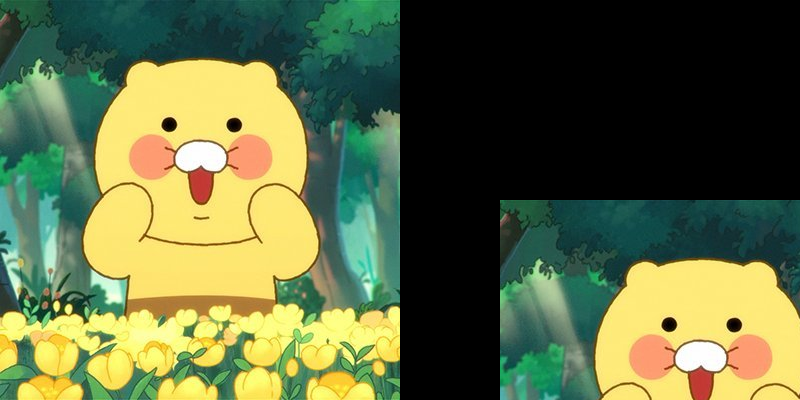

-1

In [5]:
# 이미지가 저장된 넘파이 배열의 너비와 높이를 구한다.
height, width = image.shape[:2]

# 이동 변환 행렬을 생성, x방향으로 100, y방향으로 200픽셀 이동
M = np.array([[1,0,100],[0,1,200],[0,0,1]], dtype=float)

# 결과 이미지를 저장할 넘파이 배열을 입력이미지와 같은 크기로 생성
dst = np.zeros(image.shape, dtype=np.uint8)

# 이미지의 전체 픽셀을 스캔
for y in range(height-1):
  for x in range(width-1):
    # 현재 픽셀 p의 좌표에 이동 변환 행렬 M을 곱하여 이동시킨 좌표 p_를 구한다.
    p = np.array([x,y,1])
    p_ = np.dot(M,p)

    # 이동한 위치인 p_에서 좌표 x_, y_를 정수 형태로 가져온다.
    x_,y_=p_[:2]
    x_=int(x_)
    y_=int(y_)

    # 입력 이미지 크기 내로 픽셀이 이동한 경우에만 결과 이미지를 저장할 넘파이 배열로 픽셀을 복사한다.
    if x_>0 and x_<width and y_>0 and y_<height:
      dst[y_,x_]=image[y,x]

# 입력 이미지와 결과 이미지를 수평으로 연결하여 하나의 이미지로 만든다.
result = cv2.hconcat([image,dst])
cv2_imshow(result)
cv2.waitKey(0)

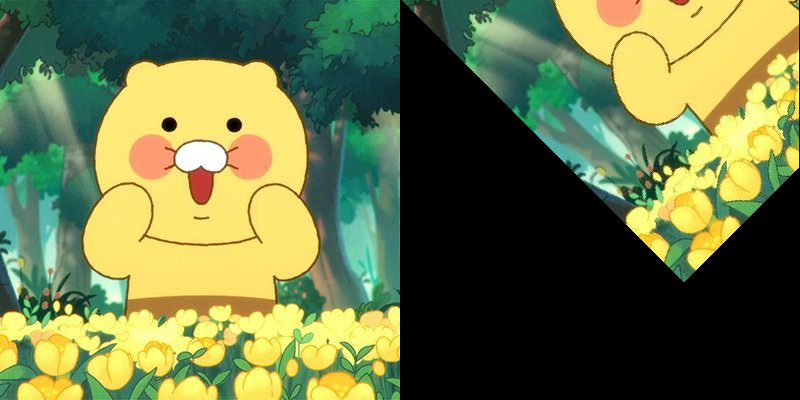

-1

In [6]:
angle = 45
radian = angle*np.pi/180
c = np.cos(radian)
s = np.sin(radian)

# 회전 변환행렬을 구성한다
# opencv의 원점이 왼쪽 아래가 아니라, 왼쪽 위라서
# [[c,-s,0],[s,c,0]]이 아니라 [[c,s,0],[-s,c,0]] 이다.

rotation_matrix = np.array([[c,s,0],[-s,c,0],[0,0,1]], dtype=float)
dst = np.zeros(image.shape, dtype=np.uint8)
for y in range(height-1):
  for x in range(width-1):
    # backward mapping
    # 결과 이미지의 픽셀 new_p로 이동하는 입력 이미지의 픽셀 old_p의 위치를 계산한다.
    new_p = np.array([x,y,1])
    inv_rotation_matrix = np.linalg.inv(rotation_matrix)
    old_p = np.dot(inv_rotation_matrix, new_p)

    # new_p 위치에 계산하여 얻은 old_p 픽셀의 값을 대입한다.
    x_,y_ = old_p[:2]
    x_=int(x_)
    y_=int(y_)

    # 입력 이미지 크기 내로 픽셀이 이동한 경우에만 결과 이미지를 저장할 넘파이 배열로 픽셀을 복사한다.
    if x_>0 and x_<width and y_>0 and y_<height:
      dst[y,x]=image[y_,x_]

result = cv2.hconcat([image,dst])
cv2_imshow(result)
cv2.waitKey(0)

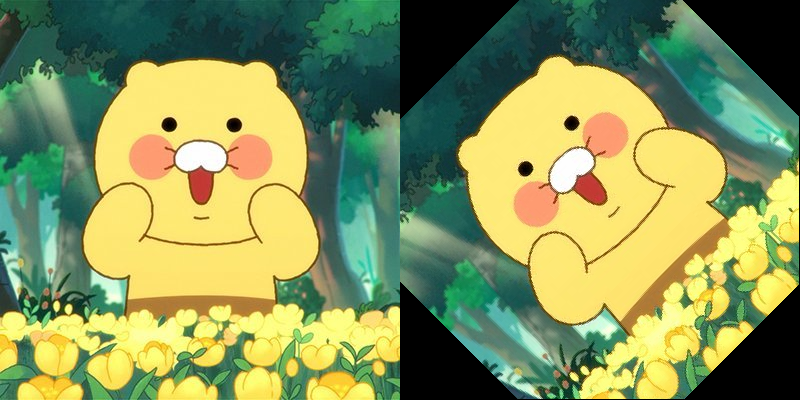

-1

In [8]:
center_x = width/2
center_y = height/2
rotation_matrix = np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]])
dst = np.zeros(image.shape, dtype=np.uint8)

for y in range(height-1):
  for x in range(width-1):
    new_p = np.array([x,y,1])
    inv_rotation_matrix = np.linalg.inv(rotation_matrix)
    old_p = np.dot(inv_rotation_matrix, new_p)
    x_,y_ = old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst[y,x]=image[y_,x_]

result = cv2.hconcat([image,dst])
cv2_imshow(result)
cv2.waitKey(0)